# Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for USGS Hydrologic Units

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Purpose" data-toc-modified-id="Purpose-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item">
<li><span><a href="#Installation-Options" data-toc-modified-id="Installation-Options-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Installation Options</a></span><ul class="toc-item"><li><span><a href="#Option-1:-Install-and-run-on-Google-Colaboratory" data-toc-modified-id="Option-1:-Install-and-run-on-Google-Colaboratory-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Option 1: Install and run on Google Colaboratory</a></span></li><li><span><a href="#Option-2:-Install-and-run-on-local-file-system" data-toc-modified-id="Option-2:-Install-and-run-on-local-file-system-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Option 2: Install and run on local file system</a></span></ul></li><li><span><a href="#Library-Imports" data-toc-modified-id="Library-Imports-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href="#Define-Functions" data-toc-modified-id="Define-Functions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Define Functions</a></span></ul></li><li><span><a href="#Data-Access-and-Processing" data-toc-modified-id="Data-Access-and-Processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Access and Processing</a></span><ul class="toc-item"><li><span><a href="#Get-3DEP-Dataset-Boundary-Polygons" data-toc-modified-id="Get-3DEP-Dataset-Boundary-Polygons-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get 3DEP Dataset Boundary Polygons</a></span></li><li><span><a href="#Create-Interactive-Ipyleaflet-Map-and-Define-the-Location-of-the-Watershed-for-3DEP-Query" data-toc-modified-id="Create-Interactive-Ipyleaflet-Map-and-Define-the-Location-of-the-Watershed-for-3DEP-Query-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span> Create Interactive Ipyleaflet Map and Define the Location of the Watershed for 3DEP Query</a></span></li><li><span><a href="#Query-the-USGS-Watershed-Boundary-Service" data-toc-modified-id="Query-the-USGS-Watershed-Boundary-Service-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Query the USGS Watershed Boundary Service</a></span></li><li><span><a href="#Find-3DEP-Polygon(s)-Intersecting-AOI" data-toc-modified-id="Find-3DEP-Polygon(s)-Intersecting-AOI-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Find 3DEP Polygon(s) Intersecting AOI</a></span></li><li><span><a href="#Specify-Point-Cloud-Resolution" data-toc-modified-id="Specify-Point-Cloud-Resolution-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Specify Point Cloud Resolution</a></span></li><li><span><a href="#Construct-and-Exectute-PDAL-Pipeline-for-Point-Cloud-Data" data-toc-modified-id="Construct-and-Exectute-PDAL-Pipeline-for-Point-Cloud-Data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Construct and Exectute PDAL Pipeline for Point Cloud Data</a></span></li><li><span><a href="#Digital-Elevation-Model-(DEM)-Generation" data-toc-modified-id="Digital-Elevation-Model-(DEM)-Generation-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Digital Elevation Model (DEM) Generation</a></span></li><ul class="toc-item"><li><span><a href="#Make-Digital-Surface-Model-(DSM)" data-toc-modified-id="Make-Digital-Surface-Model-(DSM)-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Make Digital Surface Model (DSM)</a></span></li><li><span><a href="#Make-Digital-Terrain-Model-(DTM)" data-toc-modified-id="Make-Digital-Terrain-Model-(DTM)-3.7.2"><span class="toc-item-num">3.7.2&nbsp;&nbsp;</span>Make Digital Terrain Model (DTM)</a></span></ul></ul></li><li><span><a href="#Visualize-DEMs-(DSM/DTM)"data-toc-modified-id="Visualize-DEMs-(DSM/DTM)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize DEMs (DSM/DTM)</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Resources</a></span></li><li><span><a href="#Funding-Keywords-Citation" data-toc-modified-id="Funding-Keywords-Citation-7"><span class="toc-item-num">7&nbsp;</span>Funding, Keywords, and Citation</a></span></li></ul></div>
    
<a name="Authors"></a>
 ## Authors
Cole Speed<sup>1</sup>, Matthew Beckley<sup>1</sup>, Christopher Crosby<sup>1</sup>, Viswanath Nandigam<sup>2</sup>

<sup>1</sup>UNAVCO, Inc.; <sup>2</sup>San Diego Supercomputer Center

<a name="Purpose"></a>
## Purpose

The United States Geological Survey's 3-D Elevation Program (3DEP) is collecting high-quality light detection and ranging (lidar) data over the conterminous U.S., Hawaii, and the U.S territories. Data acquisition is ongoing, with over 1800 3DEP datasets consisting of more than 42 trillion points covering an area of greater than 6.5 million $km^{2}$ already available for use. Data are hosted and publically available in Entwine Point Tile (EPT) format in an<a href="https://registry.opendata.aws/usgs-lidar/"> Amazon Web Services (AWS) S3 public bucket</a>.

3DEP point cloud data can be accessed through several user interfaces including the <a href="https://portal.opentopography.org/datasets">OpenTopography Data Portal</a> and the <a href="https://prd-tnm.s3.amazonaws.com/LidarExplorer/index.html#/process">USGS Lidar Explorer</a>. In many cases, however, users may prefer to access and produce derivative products from the 3DEP lidar data programmatically, particularly in the case of more advanced users seeking to access and process immense swaths of lidar point cloud data on local, commercial cloud, or high performance compute infrastructure. However, to date tools and/or workflows for programmatic access and processing of the 3DEP data remain underdeveloped.

This Jupyter Notebook is part of a suite developed by OpenTopography in collaboration with the USGS National Geospatial Program, in an effort to leverage available APIs and cloud resources to enhance access and usability of 3DEP data and products for the geospatial community. Importantly, these notebooks are designed to be accessible by user's with limited experience in the Python programming language and as educational tools for those looking to learn about accessing, processing, and visualizing cloud-hosted data with Python. These notebooks use open-source Python libraries, including the Point Data Abstraction Libary (PDAL) and Geospatial Data Abstraction Library (GDAL) for all point cloud and raster processing. 

This and the other use-case specific Jupyter Notebooks developed as part of this effort for programmatic 3DEP access are available in a <a href="https://github.com/OpenTopography/OT_3DEP_Workflows"> Github repository </a> and may be run locally or on the <a href="https://colab.research.google.com/">Google Colaboratory</a> cloud platform.

#### Specific features of this notebook

1. User selects a point location on an interactive map and the corresponding USGS 12-digit (Sub-watershed) or 14-digit hydrologic unit (HU) is requested via the <a href= "https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/"> USGS Watershed Boundary Dataset Map Service </a>.

2. API request to <a href="https://registry.opendata.aws/usgs-lidar/"> Amazon Web Services (AWS) EPT (Entwine Point Tile) S3 bucket</a> returns 3DEP point cloud data within user-defined 12- or 14-digit hydrologic unit (HU) for subsequent processing. 

3. Flexible and customizable PDAL pipelines are available for specifying point cloud resolution, filtering, reclassifying, and reprojecting points.

4. Option to create a Digital Terrain Model (DTM) or Digital Surface Model (DSM) for the hydrologic unit with user-specifed resolution, gridding method, and file type.

5. Point cloud data and/or derivative products are saved to local directory or on Google Drive (if user uses Google Colaboratory option, see below.)

### <font color = 'red'> Important Consideration for USGS Hydrologic Unit (HU) Data Access</font>
<font color='red'>Accessing and processing point cloud data covering the extent of USGS Hydrologic Units (HUs) requires access to significant random-access memory (RAM), particularly if high point density is desired. Jobs may not execute successfully when performing tasks on RAM-limited hardware (including Google Colaboratory, which offers 12GB RAM allocations for free access). Users are suggested to select lower density point clouds and lower resolution DEM generation options if RAM issues are encountered. If full resolution is desired, we recommend running this notebook locally on hardware with a higher RAM allocation.</font>

<a name="Setup"></a>
## Setup

<a name="Installation-Options"></a>
### Installation Options
There are two options for performing the workflow steps outlined below. **Option 1** is our suggested method for simplicity, as building a virtual environment with the required dependencies on the user's local file system can be challenging based on the user's experience level with Python and <a href="https://www.anaconda.com/"> Anaconda</a>.

1. **Option 1**: Launch the interactive Jupyter notebook on Google Colaboratory.
    - Does not require creation of a virtual environment or installation on local file system.
    - Requires Google account and access to personal Google Drive folder.
    - Data download limits will be dependent on user's available Google Drive storage. 
    - If you wish to run this notebook in Google Colaboratory click the 'Open in Colab' badge below.
    - <font color='red'> **Note:** RAM allotment for Google Colaboratory may not be sufficient for very accessing large point clouds (>100,000,000 points) </font> 
    <br/><br/>
2. **Option 2**: Download this Jupyter notebook (.ipynb file) to your local file system.
    - Create a virtual conda environment containing the required dependencies.
    - Run Juypter notebook on local machine.
    - Data download limits and computation speed will be dependent on user's hardware.
    - <font color='red'> **Note:** We suggest running notebooks locally on high-RAM hardware for jobs exceeding ~100,000,000 points </font>


<a name="Option-1:-Install-and-run-on-Google-Colaboratory"></a>
### Option 1: Install and run on Google Colaboratory
For ease-of-use, it is suggested to launch and execute these notebooks on <a href="https://colab.research.google.com/">Google Colaboratory</a> (Colab, for short), Google's Cloud Platform. Dependencies will be installed on a virtual machine on Google's cloud servers and the code will be executed directly in your browser! A major benefit of this is that you will have direct access to Google's high-end CPU/GPUs and will not have to install any dependencies locally. All deliverables will be saved to your personal Google Drive. To experiment and run one of the below Jupyter Notebooks on Google Colab click the "Open in Colab" badge below.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/03_3DEP_Generate_DEM_USGS_HUCs.ipynb)

In [ ]:
# This cell only excecutes if you're running on Colab. Installation process takes 1-2 minutes.
import os, sys
if 'google.colab' in sys.modules:
    
  # Mount Google Drive. You will be prompted to grant file I/O access to Drive.
  from google.colab import drive 
  drive.mount('/gdrive/') # Mount Google Drive! 

  # Clone OpenTopography 3DEP Workflow Git Repository
  !git clone https://github.com/OpenTopography/OT_3DEP_Workflows

  #  Install the core dependencies (other than PDAL/GDAL) from requirements.txt
  !pip install -q -r OT_3DEP_Workflows/requirements.txt

  # Install Conda (necessary to install PDAL/GDAL)
  !pip install -q condacolab
  import condacolab
  condacolab.install()
  
  # Runtime will restart automatically. Do not rerun above cells.

In [ ]:
# This cell only excecutes if you're running on Colab. This should take 1-2 minutes.
import os, sys
if 'google.colab' in sys.modules:
    # Colab requires proj_lib environment variable to be set manually.
    os.environ['PROJ_LIB'] = '/usr/local/share/proj/'

    #Install PDAL and GDAL with Mamba.
    !mamba install -q gdal python-pdal -c conda-forge --yes

**If using Option 1 (Google Colab), proceed to Library Imports**

<a name="Option-2:-Install-and-run-on-local-file-system"></a>
### Option 2: Install and run on local file system

If you would like to run the Jupyter Notebook on your local machine:

Make a new directory on your local file system where the 3DEP Jupyter Notebooks (and all 3DEP data, if desired) will be saved. In this example case, the directory will be called `3DEP`.
  
    $ mkdir 3DEP

Change into the new directory and `git clone` the Github repository containing the Jupyter Notebooks and other relevant files to your local file system.

    $ cd 3DEP
    
    $ git clone https://github.com/OpenTopography/OT_3DEP_Workflows

Anaconda is recommended for Python package installation and management. Package versions in Anaconda are managed by the package management system *conda*. Anaconda installers for MacOS/Linux/Windows can be downloaded from https://docs.anaconda.com/anaconda/install/. Follow the instructions to install Anaconda.

After installing Anaconda, create a virtual environment with the required dependencies, using the `environment.yml` file contained in the cloned Github repo). Note: Exectuting the following command will automatically create the conda environment with name `3dep` and all of the required dependencies installed. If you would prefer a different name, replace `3dep` with another name in the following command:

	$ conda env create -n 3dep --file environment.yml

Next, activate the conda environment with all of the necessary dependencies installed. 
	
	$ conda activate 3dep
    
Now, launch the chosen Jupyter Notebook. If unsure how to launch a Notebook, refer to this guide (https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html). 

**You may now proceed to Library Imports**

<a name="Library-Imports"></a>
### Library Imports

After successfully completing the steps outlined in either **Option 1** or **Option 2**, we can now import the modules for use throughout the rest of the notebook.

In [1]:
#Import Modules
import copy
import geopandas as gpd
import ipyleaflet
import ipywidgets as widgets
import json
import math
import numpy as np
import os
from osgeo import gdal
import pdal
import pyproj
import requests
from shapely.geometry import shape, Point, Polygon
from shapely.ops import transform

<a name="Define-Functions"></a>
### Define Functions

Several functions are provided in the cell below. These functions are necessary for successful execution of remainder of the notebook. Broadly, these functions provide the utility for the user to draw and area of interest (AOI) on an interactive map and construct the PDAL pipeline for getting the point cloud data from the Amazon Web Services EPT bucket, performing processing steps, producing DEMs, and saving the results. A description of the parameters are provided as docstrings in the function definitions.

**These functions can be modified as the user sees fit; however, they are designed to work with a simple execution of the below cell.**

In [2]:
def proj_to_3857(poly, orig_crs):
    """
    Function for reprojecting a polygon from a shapefile of any CRS to Web Mercator (EPSG: 3857).
    The original polygon must have a CRS assigned.
    
    Parameters:
        poly (shapely polygon): User area of interest (AOI)
        orig_crs (str): the original CRS (EPSG) for the shapefile. It is stripped out during import_shapefile_to_shapely() method

    Returns:
        user_poly_proj4326 (shapely polygon): User AOI in EPSG 4326
        user_poly_proj3857 (shapely polygon): User AOI in EPSG 3857
    """
    wgs84 = pyproj.CRS("EPSG:4326")
    web_mercator = pyproj.CRS("EPSG:3857")
    project_gcs = pyproj.Transformer.from_crs(orig_crs, wgs84, always_xy=True).transform
    project_wm = pyproj.Transformer.from_crs(orig_crs, web_mercator, always_xy=True).transform
    user_poly_proj4326 = transform(project_gcs, poly)
    user_poly_proj3857 = transform(project_wm, poly)
    return(user_poly_proj4326, user_poly_proj3857)

def gcs_to_proj(poly):
    """
    Function for reprojecting polygon shapely object from geographic coordinates (EPSG:4326) 
    to Web Mercator (EPSG: 3857)). 
    
    Parameters:
        poly (shapely polygon): User area of interest (AOI)

    Returns:
        user_poly_proj3857 (shapely polygon): User AOI in EPSG 3857
    """
    wgs84 = pyproj.CRS("EPSG:4326")
    web_mercator = pyproj.CRS("EPSG:3857")
    project = pyproj.Transformer.from_crs(wgs84, web_mercator, always_xy=True).transform
    user_poly_proj3857 = transform(project, poly)
    return(user_poly_proj3857)

def import_shapefile_to_shapely(path):
    """
    Conversion of shapefile to shapely object.
    
    Parameters:
        path (filepath): location of shapefile on user's local file system

    Returns:
        user_AOI (shapely polygon): User AOI
    """
    shapefile_path = path
    gdf = gpd.read_file(shapefile_path)
    orig_crs = gdf.crs                   # this is the original CRS of the imported shapefile
    user_shp = gdf.loc[0, 'geometry']
    user_shp_epsg4326, user_shp_epsg3857 = proj_to_3857(user_shp, orig_crs)
    user_AOI = [[user_shp_epsg4326, user_shp_epsg3857]]
    return user_AOI
    
def handle_draw(target, action, geo_json):
    """
    Functionality to draw area of interest (AOI) on interactive ipyleaflet map.
    
    Parameters:
        extent_epsg3857 (shapely polygon): Polygon of user-defined AOI
        usgs_3dep_dataset_name (str): Name of 3DEP dataset which AOI overlaps
        resolution (float): The desired resolution of the pointcloud based on the following definition:
    """
        
    geom = dict(geo_json['geometry'])
    user_poly = shape(geom)
    user_poly_proj3857 = gcs_to_proj(user_poly)
    print('AOI is valid and has boundaries of ', user_poly_proj3857.bounds, 'Please proceed to the next cell.')
    user_AOI.append((user_poly, user_poly_proj3857))  #for various reasons, we need user AOI in GCS and EPSG 3857
    
def downsample_dem(dem):
    """
    Function for evaluating whether DEM should be downsampled prior to plotting. If dem.shape is larger than target.shape, the dem is downsampled.

    Parameters:
        dem (array): 2-D numpy array representing the dem data

    Returns: 
        down_sampled (array): Downsampled 2-D numpy array (if dimensions exceed target dimensions)
        OR
        dem (array): Original 2-D numpy array (if downsampling is not needed)
    """
    target_shape = tuple((1000,1000))   # if either dimension is larger than 1000 pixels, the dem will be downsampled
    scale_factors = [dim_target / dim_input for dim_target, dim_input in zip(target_shape, dem.shape)] 
    
    if any(factor < 1 for factor in scale_factors):
        if scale_factors[0] < 1:
            new_width = dem.rio.width * scale_factors[0]
        else:
            new_width = dem.rio.width
        if scale_factors[1] < 1:
            new_height = dem.rio.height * scale_factors[1]
        else:
            new_height = dem.rio.height

        # Downsample DTM/DSM
        down_sampled = dem.rio.reproject(dem.rio.crs, shape=(int(new_height), int(new_width)), resampling=Resampling.bilinear)
        
        return down_sampled
    
    else:
        return dem
    
def build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_names, pc_resolution, filterNoise = False,
                        reclassify = False, savePointCloud = True, outCRS = 3857, pc_outName = 'filter_test', 
                        pc_outType = 'laz'):

    """
    Build pdal pipeline for requesting, processing, and saving point cloud data. Each processing step is a 'stage' 
    in the final pdal pipeline. Each stages is appended to the 'pointcloud_pipeline' object to produce the final pipeline.
    
    Parameters:
    extent_epsg3857 (shapely polygon): Polygon for user-defined AOI in Web Mercator projection (EPS:3857)Polygon is generated 
                            either through the 'handle_draw' methor or by inputing their own shapefile.
    usgs_3dep_dataset_names (str): List of name of the 3DEP dataset(s) that the data will be obtained. This parameter is set 
                                determined through intersecttino of the 3DEP and AOI polys.
    pc_resolution (float): The desired resolution of the pointcloud based on the following definition:
        
                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.
                            
    filterNoise (bool): Option to remove points from USGS Class 7 (Low Noise) and Class 18 (High Noise).
    reclassify (bool): Option to remove USGS classes and run SMRF to classify ground points only. Default == False.
    savePointCloud (bool): Option to save (or not) the point cloud data. If savePointCloud == False, 
           the pc_outName and pc_outType parameters are not used and can be any value.
    outCRS (int): Output coordinate reference systemt (CRS), specified by ESPG code (e.g., 3857 - Web Mercator)
    pc_outName (str): Desired name of file on user's local file system. If savePointcloud = False, 
                  pc_outName can be in value.
    pc_outType (str):  Desired file extension. Input must be either 'las' or 'laz'. If savePointcloud = False, 
                  pc_outName can be in value. If a different file type is requested,the user will get error.
    
    Returns:
        pointcloud_pipeline (dict): Dictionary of processing stages in sequential order that define PDAL pipeline.

    Raises: 
        Exception: If user passes in argument that is not 'las' or 'laz'.
    """
    
    #this is the basic pipeline which only accesses the 3DEP data
    readers = []
    for name in usgs_3dep_dataset_names:
        url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/{}/ept.json".format(name)
        reader = {
            "type": "readers.ept",
            "filename": str(url),
            "polygon": str(extent_epsg3857),
            "requests": 3,
            "resolution": pc_resolution
        }
        readers.append(reader)
        
    pointcloud_pipeline = {
            "pipeline":
                readers
    }
    
    if filterNoise == True:
        
        # Filter stage for class 7
        filter_stage_class7 = {
            "type": "filters.range",
            "limits": "Classification![7:7]"
        }

        # Filter stage for class 18
        filter_stage_class18 = {
            "type": "filters.range",
            "limits": "Classification![18:18]"
        }

        # Append both filter stages to the pipeline separately
        pointcloud_pipeline['pipeline'].append(filter_stage_class7)
        pointcloud_pipeline['pipeline'].append(filter_stage_class18)
    
    if reclassify == True:
        
        remove_classes_stage = {
            "type":"filters.assign",
            "value":"Classification = 0"
        }
        
        classify_ground_stage = {
            "type":"filters.smrf"
        }
        
        reclass_stage = {
            "type":"filters.range",
            "limits":"Classification[2:2]"
        }

        pointcloud_pipeline['pipeline'].append(remove_classes_stage)
        pointcloud_pipeline['pipeline'].append(classify_ground_stage)
        pointcloud_pipeline['pipeline'].append(reclass_stage)
        
    reprojection_stage = {
        "type":"filters.reprojection",
        "out_srs":"EPSG:{}".format(outCRS)
    }
    
    pointcloud_pipeline['pipeline'].append(reprojection_stage)
    
    if savePointCloud == True:
        
        if pc_outType == 'las':
            savePC_stage = {
                "type": "writers.las",
                "filename": str(pc_outName)+'.'+ str(pc_outType),
            }
        elif pc_outType == 'laz':    
            savePC_stage = {
                "type": "writers.las",
                "compression": "laszip",
                "filename": str(pc_outName)+'.'+ str(pc_outType),
            }
        else:
            raise Exception("pc_outType must be 'las' or 'laz'.")

        pointcloud_pipeline['pipeline'].append(savePC_stage)
        
    return pointcloud_pipeline

def make_DEM_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, dem_resolution,
                      filterNoise = True, reclassify = False, savePointCloud = False, outCRS = 3857,
                      pc_outName = 'filter_test', pc_outType = 'laz', demType = 'dtm', gridMethod = 'idw', 
                      dem_outName = 'dem_test', dem_outExt = 'tif', driver = "GTiff"):
    
    """
    Build pdal pipeline for creating a digital elevation model (DEM) product from the requested point cloud data. The 
    user must specify whether a digital terrain (bare earth) model (DTM) or digital surface model (DSM) will be created, 
    the output DTM/DSM resolution, and the gridding method desired. 

    The `build_pdal_pipeline() method is used to request the data from the Amazon Web Services ept bucket, and the 
    user may define any processing steps (filtering, reclassifying, reprojecting). The user must also specify whether 
    the point cloud should be saved or not. Saving the point cloud is not necessary for the generation of the DEM. 

    Parameters:
        extent_epsg3857 (shapely polygon): User-defined AOI in Web Mercator projection (EPS:3857). Polygon is generated 
                                           either through the 'handle_draw' methor or by inputing their own shapefile.
                                           This parameter is set automatically when the user-defined AOI is chosen.
        usgs_3dep_dataset_names (list): List of name of the 3DEP dataset(s) that the data will be obtained. This parameter is set 
                                        determined through intersecttino of the 3DEP and AOI polys.
        pc_resolution (float): The desired resolution of the pointcloud based on the following definition:

                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.

        pc_outName (str): Desired name of file on user's local file system. If savePointcloud = False, 
                          pc_outName can be in value.
        pc_outType (str): Desired file extension. Input must be either 'las' or 'laz'. If savePointcloud = False, 
                          pc_outName can be in value. If a different file type is requested,the user will get error.
    
        dem_resolution (float): Desired grid size (in meters) for output raster DEM 
        filterNoise (bool): Option to remove points from USGS Class 7 (Low Noise) and Class 18 (High Noise).
        reclassify (bool): Option to remove USGS classes and run SMRF to classify ground points only. Default == False.
        savePointCloud (bool): Option to save (or not) the point cloud data. If savePointCloud == False, the pc_outName 
                               and pc_outType parameters are not used and can be any value.

        outCRS (int): Output coordinate reference systemt (CRS), specified by ESPG code (e.g., 3857 - Web Mercator)
        pc_outName (str): Desired name of file on user's local file system. If savePointcloud = False, 
                          pc_outName can be in value.
        pc_outType (str): Desired file extension. Input must be either 'las' or 'laz'. If a different file type is requested,
                    the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
                    pc_outName can be in value.
        demType (str): Type of DEM produced. Input must 'dtm' (digital terrain model) or 'dsm' (digital surface model).
        gridMethod (str): Method used. Options are 'min', 'mean', 'max', 'idw'.
        dem_outName (str): Desired name of DEM file on user's local file system.
        dem_outExt (str): DEM file extension. Default is TIF.
        driver (str): File format. Default is GTIFF
    
    Returns:
        dem_pipeline (dict): Dictionary of processing stages in sequential order that define PDAL pipeline.
    Raises: 
        Exception: If user passes in argument that is not 'las' or 'laz'.
        Exception: If user passes in argument that is not 'dtm' or 'dsm'

    """

    dem_pipeline = build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution,
                                              filterNoise, reclassify, savePointCloud, outCRS, pc_outName, pc_outType)
    
    if demType == 'dsm':
        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    elif demType == 'dtm':
        groundfilter_stage = {
                "type":"filters.range",
                "limits":"Classification[2:2]"
        }

        dem_pipeline['pipeline'].append(groundfilter_stage)

        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    else:
        raise Exception("demType must be 'dsm' or 'dtm'.")
        
    dem_pipeline['pipeline'].append(dem_stage)
    
    return dem_pipeline

<a name="Data-Access-and-Processing"></a>
## Data Access and Processing
Now that we have the required modules imported and functions defined, we can proceed with defining our area of interest (AOI), accessing/processing the 3DEP data from the Amazon Web Services EPT bucket. 

<a name="Get-3DEP-Dataset-Boundary-Polygons"></a>
### Get 3DEP Dataset Boundary Polygons  
First, we will get the 3DEP dataset polygon boundaries to see if 3DEP data is currently available for our area of interest. An up-to-date version of the currently available 3DEP dataset boundaries are maintained by Hobu Inc. in the usgs-lidar Github repository https://github.com/hobuinc/usgs-lidar/. 

In the following cell, we use an API request to get the boundaries from the repository and save a local copy of these boundaries in geojson format. Next, we create a geopandas dataframe object to easily access the names, url, and point count of each dataset, and we use the ```gcs_to_proj()``` function to project each 3DEP polygon geometry to Web Mercator projection (EPSG: 3857), which is the native projection of the 3DEP data in the AWS S3 bucket.

In [17]:
# Get GeoJSON file for 3DEP outlines from URL 

print("Requesting, loading, and projecting 3DEP dataset polygons...")

#request the boundaries from the Github repo and save locally.
url = 'https://raw.githubusercontent.com/hobuinc/usgs-lidar/master/boundaries/resources.geojson'
r = requests.get(url)
with open('resources.geojson', 'w') as f:
    f.write(r.content.decode("utf-8"))

with open('resources.geojson', 'r') as f:
    geojsons_3DEP = json.load(f)
    
#make pandas dataframe and create pandas.Series objects for the names, urls, and number of points for each boundary.
with open('resources.geojson', 'r') as f:
    df = gpd.read_file(f)
    names = df['name']
    urls = df['url']
    num_points = df['count']

#project the boundaries to EPSG 3857 (necessary for API call to AWS for 3DEP data)
projected_geoms = []
for geometry in df['geometry']:
        projected_geoms.append(gcs_to_proj(geometry))

geometries_GCS = df['geometry']
geometries_EPSG3857 = gpd.GeoSeries(projected_geoms)

print('Done. 3DEP polygons downloaded and projected to Web Mercator (EPSG:3857)')

<a name="Create-Interactive-Ipyleaflet-Map-and-Define-the-Location-of-the-Watershed-for-3DEP-Query"></a>
###  Create Interactive Ipyleaflet Map and Define the Location of the Watershed for 3DEP Query
Next, we will specify the location of the desired USGS 12-digit (Subwatershed) or 14-digit HUC using an ipyleaflet interactive map and the 3DEP dataset polygons loaded in the prior step.  There are currently two options for specifying the watershed:

1. **Option 1** - Define a point (lat/lon) on the map that you would like the watershed boundary. If you know the coordinates of a point within the watershed, replace the values for `lon` and `lat` below.

2. **Option 2** - User places a maker on an ipyleaflet interactive map to define location. If you don't know the coordinates, execute the following cell, leaving lon/lat = 0.0.

Running the next cell will produce an interactive map, make an ipyleaflet layer out of the 3DEP dataset polygon geojson, and allow the user to place a marker to define the location of the desired USGS 12- or 14-digit HUC. When the map is rendered, use the +/- symbols to zoom in and out. The currently available 3DEP datasets are shown in transparent green polygons. The current functionality of the notebook allows the user AOI to straddle multiple 3DEP datsets. In this case, points from both datasets will be queried and merged into the resulting las/laz file.

**Important Note 1:** Use the 'marker' shaped button on the left sidebar to place a marker on the map. None of the other tools in the sidebar should be used in this notebook.

**Important Note 2:** If the user would like to place a new marker, the cell below must be re-executed each and every time. If multiple markers are drawn on the same interactive map without re-executing the cell, subsequent cells will not function appropriately. The cell must be run each and every time the user would like to define a new AOI.


In [4]:
# replace lon/lat to use option 1, leave both as 0.0 to use option 2.
# cell must be executed for both option 1 and option 2.
lon = 0.0
lat = 0.0
location = Point(lon,lat)

In [16]:
geo_json_3DEP = ipyleaflet.GeoJSON(data=geojsons_3DEP, style = {'color': 'green', 'opacity':1, 
                                       'weight':1, 'fillOpacity':0.1})

dc = ipyleaflet.DrawControl(
    marker={"shapeOptions": {"color": "blue"}},
    polyline={},
    polygon={},
    circlemarker={},
)

if location.coords[0] != (0.0, 0.0):
    user_AOI = [[location]]
    marker = ipyleaflet.Marker(location=(lat,lon), draggable=False)

    m = ipyleaflet.Map(
        basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
        center=(lat, lon),
        zoom=7,
        crs=ipyleaflet.projections.EPSG3857
        )
    
    m.add_layer(geo_json_3DEP)  
    m.add_layer(marker);
    display(m)
    print("The blue marker indicates the location of the lat/lon provided. Proceed to the next cells to get the corresponding HUC boundary")

else:
    print('Place a marker on the map to locate the appropriate watershed where you would like 3DEP data using the tools on the left side of the map.')
    
    m = ipyleaflet.Map(
        basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
        center=(37, -100),
        zoom=3.5,
        crs=ipyleaflet.projections.EPSG3857
        )
    
    m.add_layer(geo_json_3DEP)  #add 3DEP polygons GeoJSON
    
    user_AOI = []
    dc.on_draw(handle_draw)
    m.add_control(dc)
    display(m)

<a name="Query-the-USGS-Watershed-Boundary-Service"></a>
### Query the USGS Watershed Boundary Service
Now that the user-defined location is specified, the following cell will make an API request to the USGS Map Service for the 12- or 14-digit HUC boundaries and return the relevant quadrangle as a geojson.

The  `url = ../MapServer/6/` corresponds to the 12-digit HUCs. The  `url = ../MapServer/7/` corresponds to the 14-digit HUCs (commented out by default). The index for other map boundaries can be found <a href= "https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/"> here </a>. Keep in mind that the 12-digit (subwatershed) HUs usually contain up to 1 billion points. Selecting anything larger (e.g., 10-digit (Watershed) HUs) will result in *very* large point clouds and much longer compute times. We have not tested functionality on HU's larger than 12-digit.

In [7]:
#reformat bounding box for query
user_AOI_center = user_AOI[-1][0].centroid
user_AOI = user_AOI[-1][0].bounds
user_AOI = str(user_AOI)
user_AOI = user_AOI.strip('()')

Now exectute the call to the USGS Watershed Boundary Dataset REST API. There are several possibilities here if the following step does not execute properly. There is a print statement implemented that should provide some indication of which it is. 

1. If you receive the error `Error with Service Call` or `Error loading JSON output`, this most likely indicates that the region you selected does coincide with a USGS hydrologic unit from that particular service.

2. If you recieve the error `{'message': 'Endpoint request timed out'}`, this likely indicates the Watershed Boundary Dataset service may be down. To check, click this link (https://stats.uptimerobot.com/gxzRZFARLZ/783928857). If you are greeted with the message `ScienceBase is down.`, the service is temporarily down and it is not possible to query the service at this time. 

If the cell executes successfully, the interesecting watershed boundary geometry will be printed. 

In [15]:
#url for 12-digit HUCs is ../MapServer/6/
#url = 'https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/7/query?'   #14-Digit HUC
url = 'https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer/6/query?'   #12-Digit HUC

#the parameters here will query the map server for the appropriate HU boundary
params = dict(geometry=user_AOI,geometryType='esriGeometryEnvelope',inSR='4326',
              spatialRel='esriSpatialRelIntersects',f='geojson')

#Execute REST API call.  
try:
    r = requests.get(url,params=params)
except:
    print('Error with Service Call. This could mean that there is no hydrologic unit polygon where you selected.')

#load API JSON output into a variable
try:
    wbd_geojson = json.loads(r.content)
    print(wbd_geojson)   
except:
    print('Error loading JSON output')

#To write out a JSON file...
with open('WBD_API_Query.geojson', 'w') as outfile:
    json.dump(wbd_geojson, outfile)

<a name="Find-3DEP-Polygon(s)-Intersecting-AOI"></a>
### Find 3DEP Polygon(s) Intersecting AOI
Now that the user-specified hydrologic unit boundary is defined, the following cell will determine the intersecting 3DEP dataset names and show them on an interactive map. These names will be used in the API request to the AWS EPT bucket along with the user-defined quad. `intersecting_polys` will be a list of the intersecting 3DEP dataset name(s), boundary(ies) in EPSG: 4326, boundary(ies) in EPSG: 3857, url(s), and the number of points in the entire 3DEP dataset(s). The dataset names will be used in the API request to the AWS EPT S3 bucket. A ratio of the total number of points and the area of the user-defined AOI will be used to estimate the total points within the AOI.

In [14]:
with open("WBD_API_Query.geojson") as jsonFile:
        wbd_geojson = json.load(jsonFile)
        jsonData = wbd_geojson["features"]
        WBD_names = []
        WBD_geometries = []
        for x in jsonData:
            for value in x['properties'].values():                
                WBD_names.append(value)

with open('WBD_API_Query.geojson', 'r') as f:
    df = gpd.read_file(f)

projected_geoms = []
for geometry in df['geometry']:
        projected_geoms.append(gcs_to_proj(geometry))

user_wbd12 = df['geometry']
user_wbd12_EPSG3857 = gpd.GeoSeries(projected_geoms)
        
    

#here find the interesecting 3DEP datasets
intersecting_polys = []
for i,geom in enumerate(geometries_EPSG3857):
    if geom.intersects(user_wbd12_EPSG3857[0]):
        intersecting_polys.append((names[i], geometries_GCS[i], geometries_EPSG3857[i], urls[i], num_points[i]))
        
if len(intersecting_polys) == 0:
    raise Exception('the watershed you selected or coordinates you entered do not overlap existing 3DEP data.')

print(intersecting_polys)

<a name="Specify-Point-Cloud-Resolution"></a>
### Specify Point Cloud Resolution
Executing the next cell will show the AOI, the relevant 3DEP dataset(s) on another interactive map, and the option to specify point cloud resolution. 

Importantly, after the map is rendered, the user must define the desired 'point cloud resolution' using the radio buttons below the map. An estimation of the total number of lidar points within the bounding box is provided based on the area of the AOI and the total number of lidar points in the 3DEP dataset(s). Selecting the "Full" option will return all points in the quad (this number will be quite large, >1 billion points in some cases). Selecting any of the other options for resoltuion will return the appropriate number of points to ensure at least one lidar point per Nth meter (where N is the chosen resolution). The user is not alone if they are at least somewhat confused by the concept of resolution in this sense. The Entwine Point Tile (EPT) file format utilizes an octree structure for the point cloud, and in essense, the chosen resolution defines how deep in the octree to request points to obtain the specified resolution. This depth, and total number points varies drastically based on a number of parameters including local topography and vegetation. Therefore, the 'resolution' paramater and the total point count do not scale linearly. In other words, specifying a resolution of 2m will likely return far less than half of the number of points returned with 'full' resolution. The estimate of the full poin total provided is not exact, but should give the user some idea of how many points to expect the resultant point cloud to contain. 

Executing the next cell will show the AOI, the relevant 3DEP dataset(s) on another interactive map, and the option to specify point cloud resolution. Select the appropriate radio button below the map to specify `pointcloud_resolution`.

### <font color = 'red'> Important Consideration for USGS Hydrologic Unit (HU) Data Access</font>

<font color='red'>Accessing and processing point cloud data covering the extent of USGS Hydrologic Units (HUs) requires access to significant random-access memory (RAM), particularly if high point density is desired. Jobs may not execute successfully when performing tasks on RAM-limited hardware (including Google Colaboratory, which offers 12GB RAM allocations for free access). Users are suggested to select lower density point clouds and lower resolution DEM generation options if RAM issues are encountered. If full resolution is desired, we recommend running this notebook locally on hardware with a higher RAM allocation.</font>

In [13]:
# Find AOI center for plotting purposes
centroid =  list(user_wbd12[0].centroid.coords)[0]

#make ipyleaflet map
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(centroid[1],centroid[0]),
    zoom=10,
    )

#add intersecting 3DEP polygon(s) to the map
wlayer_3DEP_list = []
usgs_3dep_datasets = []
number_pts_est = []
for i, poly in enumerate(intersecting_polys):
    wlayer_3DEP = ipyleaflet.WKTLayer(
        wkt_string=poly[1].wkt, 
        style={"color": "green"})
    
    m.add_layer(wlayer_3DEP)
    wlayer_3DEP_list.append(wlayer_3DEP)
    usgs_3dep_datasets.append(poly[0])
    
    #estimate total points using ratio of area and point count
    number_pts_est.append((int((user_wbd12_EPSG3857.area/poly[2].area)*(poly[4]))))


#make ipyleaflet layers from the AOI and add to map
wlayer_user = ipyleaflet.WKTLayer(
    wkt_string=user_wbd12[0].boundary.wkt,
    style={"color": "blue"}
)

user_wbd12_EPSG3857_wkt = user_wbd12_EPSG3857[0].wkt

m.add_layer(wlayer_user)


#sum the estimates of the number of points from each 3DEP dataset within the AOI
num_pts_est = sum(number_pts_est)

#Plot map and specify desired point cloud resolution using a widget
user_resolution = widgets.RadioButtons(
    options=[
        (f'Full - All ~{int(math.ceil(num_pts_est/1e6)*1e6):,} points', 1.0),
        (f'High - 2m resolution', 2.0),
        (f'Mid  - 5m resolution', 5.0),
        (f'Low  - 10m resolution', 10.0)
    ],
    layout={'width': 'max-content'},
    disabled = False,
)

display(m)
print(f'Your AOI at full resolution will include approximately {int(math.ceil(num_pts_est/1e6)*1e6):,} points. Select desired point cloud resolution.')
widgets.VBox(
    [user_resolution]
)

<font color='red'> **Note**: Lidar point clouds can get *very* large, *very* fast. At full resolution a 12-Digit HUC can contain > 500,000,000 points. Selecting the `Full` or `High` option when using Google Colaboratory (12GB RAM allocation) will likely cause the runtime to fail. If full resolution is desired, we recommend running this notebook locally on hardware with a higher RAM allocation. Keep this in mind when deciding the AOI size and point cloud resolution above!</font>

The AOI bounding box, the relevant 3DEP dataset name(s), and the desired point cloud resolution are now defined. We can proceed with the API request to the AWS EPT bucket, processing, visualizing, and saving the data.

<a name="Construct-and-Exectute-PDAL-Pipeline-for-Point-Cloud-Data"></a>
### Construct and Exectute PDAL Pipeline for Point Cloud Data
The Point Data Abstraction Library (PDAL) is an open-source tool for translating and manipulating point cloud data. PDAL pipelines are useful ways of processing and manipulating point cloud data and creating derivative products. Pipelines comprise one or more stages that are read and executed in order on the point cloud dataset(s). 

The PDAL pipeline is constructed using the ```build_pdal_pipeline()``` function, and will construct the appropriate pipeline for the user's specifications (defined as function arguments). Executing this pipeline will make the API request, perform processing on the point cloud data (chosen by user) and provide the final result on the user's file system of Google Drive (Google Colab).  

Paramaters (for more detailed descriptions of parameters, see <a href="#Define-Functions" data-toc-modified-id="Define-Functions-6.3">the function definitions</a>, above: <br>
```user_wbd_poly_proj3857```: the user-defined HUC boundary<br>
```usgs_3dep_datasets```: the intersecting 3DEP dataset names<br>
```pointcloud_resolution```: point cloud resolution (1m, 2m, 5m, 10m)<br>
```filterNoise```: remove the points of Class 7 (low noise) and Class 18 (high noise);<br>
```reclassify```: remove USGS classes and run an SMRF to classify ground points only<br>
```savePointCloud```: specify if point cloud data should be saved to local file system<br>
```outCRS```: specify the coordinate reference system (CRS, in EPSG) of the output dataset.<br>
```pc_outName```: name of point cloud on local file system<br>
```pc_outType```: file type, las or laz (laszip compression). Options are 'las' or 'laz'<br>

**Important Note 1: The ```user_wbd12_EPSG3857_wkt```, ```usgs_3dep_datasets```, and ```pointcloud_resolution``` arguments are already defined. These should not be modified.**

In [12]:
# Do not modify user_wbd12_EPSG3857_wkt, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change outCRS to EPSG code of desired coordinate reference system (Default is EPSG:3857 - Web Mercator Projection)
# Change pc_outname to descriptive name and pc_outType to 'las' or 'laz'.

pointcloud_resolution = user_resolution.value
pc_pipeline = build_pdal_pipeline(user_wbd12_EPSG3857_wkt, usgs_3dep_datasets, pointcloud_resolution, filterNoise = True,
                                  reclassify = False, savePointCloud = True, outCRS = 3857,
                                  pc_outName = 'wbd_test', pc_outType = 'laz')

The PDAL pipeline is now constructed. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a json-ized version of the pointcloud pipeline we created.

In [ ]:
pc_pipeline = pdal.Pipeline(json.dumps(pc_pipeline))

The cell below will execute the pc_pipeline object, which will make the API request, performing processing, and save the point cloud (if `savePointCloud == True`) at the specified location, name, and extension.

Executing the pipeline in streaming mode will speed up the process and cuts down on the required RAM. The `%%time` magic command will return the total computation time. The final output is the total number of points returned.

**Note**: If `reclassify == True` in the pipeline constructed above, a step is added for removing assigned USGS classifications and running a SMRF filter to classify ground points only. When `reclassify == True`, the PDAL pipeline cannot be executed in streaming mode, as reclassification requires all points to be present in memory. **<font color='red'>Be aware that this will be slower than executing in streaming mode and may not be possible for very large point clouds due to RAM limitations.</font>** Commands for executing the pipeline in streaming and non-streaming mode are included below. Comment/uncomment the appropriate command below (depending on whether `reclassify == True` or `reclassify == False` in the pipeline constructed above).

In [ ]:
%%time
pc_pipeline.execute_streaming(chunk_size=1000000) # use this if reclassify == False 
#pc_pipeline.execute() # use this if reclassify == True 

If the user only desires point cloud data, they may stop here. Following is an overview on how a DSM and DTM may be created.

<a name="Digital-Elevation-Model-(DEM)-Generation"></a>
### Digital Elevation Model (DEM) Generation 
The following cells may be run to produce a DSM and DTM of the user-defined AOI. The DTM is produced using only points classified as 'Ground' (USGS Class 2), and therefore, represents the surface of the ground beneath any vegetation. Alternatively, a DSM uses all points to produce a representation of the surface including vegetation and other structures. 

The DTM/DSM is produced using an analogous approach to point cloud request and processsing. Namely, a PDAL pipeline is constructed using the function `make_DEM_pipeline()`. This function first constructs a pipeline using `build_pdal_pipeline()` to create stages related to point cloud access and processing. The function then appends PDAL stages specific to the creation of gridded products that fit the specification of the user (defined as function arguments), namely dem resolution and dem type.

Paramaters (for more detailed descriptions of parameters, see <a href="#Define-Functions" data-toc-modified-id="Define-Functions-6.3">the function definitions</a>, above:<br>
`user_wbd12_EPSG3857_wkt`: the user-defined area of interest (AOI)<br>
`usgs_3dep_dataset`: the corresponding 3DEP dataset name<br>
`pointcloud_resolution`: point cloud resolution (1m, 2m, 5m, 10m)<br>
`dem_generation`: grid size for dem product (specified in meters)<br>
`filterNoise`: remove the points of Class 7 (noise); optional<br>
`reclassify`: remove USGS classes and run an SMRF to classify ground points only<br>
`savePointCloud`: specify if point cloud data should be saved to local file system<br>
`pc_outName`: name of point cloud on local file system<br>
`pc_outType`: file type, las or laz (laszip compression). Options are 'las' or 'laz'<br>
`demType`: specifies to create digital surface model (DSM) or digital terrain model (DTM)<br>
`gridMethod`: gridding method to use; options: (min, mean, max, idw)<br>
`dem_outName`: name of dem on local file system <br>
`dem_outExt`: extension of file on local file system (must correspond to what is chosen for ```driver```<br>
`driver`: gdal code of the driver (default is "GTiff"; other options can be found at https://gdal.org/drivers/raster/index.html<br>

**Important note 1: The `make_DEM_pipeline()` function is used for the making of both DSM and DTM products. The type of DEM (DSM/DTM) is specified in the `demType` argument (e.g., `demType = 'dsm'`)**

**Important Note 2: The `user_wbd12_EPSG3857_wkt`, `usgs_3dep_datasets`, and `pointcloud_resolution` arguments are already defined after running the above cells. These should not be modified.**

<a name="Make-Digital-Surface-Model-(DSM)"></a>
### Make Digital Surface Model (DSM)
The following cells will produce a Digital Surface Model (DSM) using all of the lidar returns in the point cloud.
Do not modify the `user_wbd12_EPSG3857_wkt`, `usgs_3dep_datasets`, or `pointcloud_resolution` arguments. Specify the desired dsm resolution (in meters), the appropriate point cloud processing steps, and the file names/extensions.

In [ ]:
# Do not modify user_wbd12_EPSG3857_wkt, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change outCRS to EPSG code of desired coordinate reference system (Default is EPSG:3857 - Web Mercator Projection)
# Change dem_outName to descriptive name; dem_outExt can be any extension supported by gdal.

pointcloud_resolution = user_resolution.value
dsm_resolution = 2.0
dsm_pipeline = make_DEM_pipeline(user_wbd12_EPSG3857_wkt, usgs_3dep_datasets, pointcloud_resolution, dsm_resolution,
                                 filterNoise = True, reclassify = False,  savePointCloud = False, outCRS = 3857,
                                 pc_outName = 'wbd_test', pc_outType = 'laz', demType = 'dsm',
                                 gridMethod='idw', dem_outName = 'test_dsm_wbd', dem_outExt = 'tif', driver = "GTiff")

The PDAL pipeline is now constructed for making the DSM. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a json-ized version of the pointcloud pipeline we created.

In [ ]:
dsm_pipeline = pdal.Pipeline(json.dumps(dsm_pipeline))

The cell below will execute the dsm_pipeline object, which will make the API request, performing processing, and save the point cloud (if `savePointCloud == True`) and create and save the DSM at the specified location, name, and extension. 

Executing the pipeline in streaming mode will speed up the process and cuts down on the required RAM. The `%%time` magic command will return the total computation time. The final output is the total number of points returned.

**Note**: If `reclassify == True` in the pipeline constructed above, a step is added for removing assigned USGS classifications and running a SMRF filter to classify ground points only. When `reclassify == True`, the PDAL pipeline cannot be executed in streaming mode, as reclassification requires all points to be present in memory. **<font color='red'>Be aware that this will be slower than executing in streaming mode and may not be possible for very large point clouds due to RAM limitations.</font>** Commands for executing the pipeline in streaming and non-streaming mode are included below. Comment/uncomment the appropriate command below (depending on whether `reclassify == True` or `reclassify == False` in the pipeline constructed above).

In [ ]:
%%time
dsm_pipeline.execute_streaming(chunk_size=1000000) # use this if reclassify == False
#dsm_pipeline.execute() # use this if reclassify == True  

Below, the same process is outlined for the making of at DTM. 

<a name="Make-Digital-Terrain-Model-(DTM)"></a>
### Make Digital Terrain Model (DTM)
The following cells will produce a Digital Terrain Model (DTM), also called a 'bare earth model' using lidar returns classified as 'ground' (USGS Class 2). Do not modify the `user_wbd12_EPSG3857_wkt`, `usgs_3dep_datasets`, or `pointcloud_resolution` arguments. Specify the desired dtm resolution (in meters), the appropriate point cloud processing steps, and the file names/extensions.

In [1]:
# Do not modify user_wbd12_EPSG3857_wkt, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change outCRS to EPSG code of desired coordinate reference system (Default is EPSG:3857 - Web Mercator Projection)
# Change dem_outname to descriptive name and change dem_outExt and driver to desired file type.

pointcloud_resolution = user_resolution.value
dtm_resolution = 2.0
dtm_pipeline = make_DEM_pipeline(user_wbd12_EPSG3857_wkt, usgs_3dep_datasets, pointcloud_resolution, dtm_resolution,
                                 filterNoise = True, reclassify = False, savePointCloud = False, outCRS = 3857,
                                 pc_outName = 'wbd_test', pc_outType = 'laz', demType = 'dtm', 
                                 gridMethod = 'idw', dem_outName = 'test_dtm_wbd', dem_outExt = 'tif', driver = "GTiff")

The PDAL pipeline is now constructed for making the DTM. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a json-ized version of the pointcloud pipeline we created.

In [ ]:
dtm_pipeline = pdal.Pipeline(json.dumps(dtm_pipeline))

The cell below will execute the dtm_pipeline object, which will make the API request, performing processing, and save the point cloud (if `savePointCloud == True`) and create and save the DTM at the specified location, name, and extension. 

Executing the pipeline in streaming mode will speed up the process and cuts down on the required RAM. The `%%time` magic command will return the total computation time. The final output is the total number of points returned.

**Note**: If `reclassify == True` in the pipeline constructed above, a step is added for removing assigned USGS classifications and running a SMRF filter to classify ground points only. When `reclassify == True`, the PDAL pipeline cannot be executed in streaming mode, as reclassification requires all points to be present in memory. **<font color='red'>Be aware that this will be slower than executing in streaming mode and may not be possible for very large point clouds due to RAM limitations.</font>** Commands for executing the pipeline in streaming and non-streaming mode are included below. Comment/uncomment the appropriate command below (depending on whether `reclassify == True` or `reclassify == False` in the pipeline constructed above).

In [ ]:
%%time
dtm_pipeline.execute_streaming(chunk_size=1000000) # use this if reclassify == False 
#dtm_pipeline.execute() # use this if reclassify == True

<a name="Visualize-DEMs-(DSM/DTM)"></a>
## Visualize the DEM (DSM/DTM)
We can now visualize the DSM or DTM products in the Jupyter Notebook. We use the <a href="https://corteva.github.io/rioxarray/stable/"> rioxarray </a> and <a href="https://matplotlib.org/stable/users/index.html"> matplotlib </a> Python libraries for simple plotting. We import `rioxarray` and `matplotlib.pyplot` here.

In [1]:
import rioxarray as rio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

Now we must define the file name we would like to plot. This could be a file path (e.g., `/path/to/my/dtm/dtm.tif`). Then we open the dtm as an `xarray` object.

In [2]:
dtm_name = 'test_dtm_wbd.tif' # /path/to/your/dtm/dtm.tif
dtm = rio.open_rasterio(dtm_name, masked=True).squeeze()

DEMs can be very large and require significant RAM to plot. Here, we apply a downsampling technique for more efficient visualization.

In [ ]:
dtm = downsample_dem(dtm)

Now we plot the DTM. By default, we use the 'viridis' colorbar to plot the bare earth elevation. Other colormaps can be used, and more information about available colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html.

Using the argument `robust=True` stretches the colors between the 2nd and 98th percentiles of our elevation data. This is just for visualization - the original values are preserved.

(-8596391.43, -8569211.43, 4700042.31, 4714398.31)

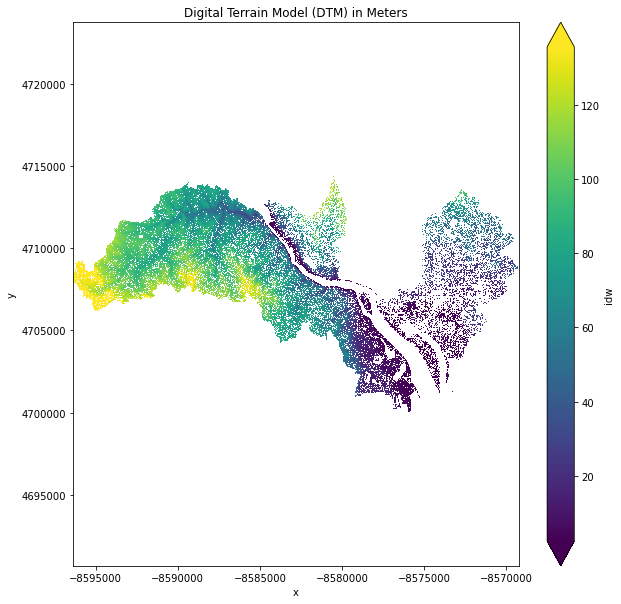

In [3]:
plt.figure(figsize=(10,10))
dtm.plot(cmap="viridis", robust=True)
plt.title("Digital Terrain Model (DTM) in Meters")
plt.ticklabel_format(style="plain")
plt.axis('equal')

Pretty cool, right? But what if we would like to look at a statistical distribution of the elevation in this region? We can plot a simple histogram, as shown below.

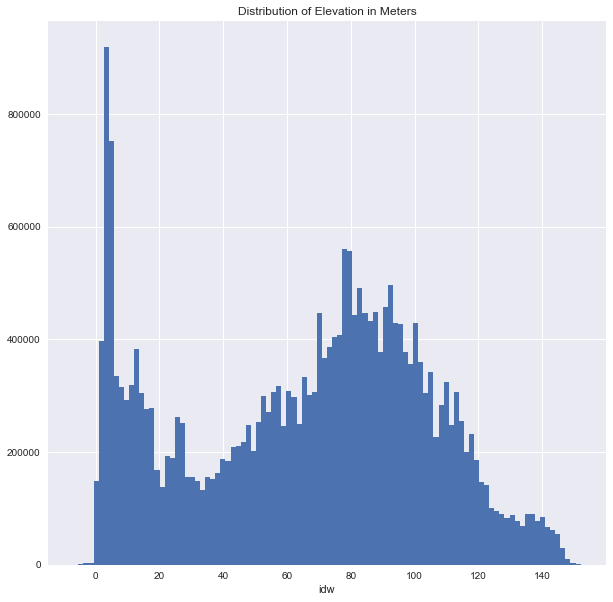

In [4]:
plt.figure(figsize=(10,10))
dtm.plot.hist(bins=100)
plt.title("Distribution of Elevation in Meters");

<a name="Conclusion"></a>
## Conclusion
This Jupyter Notebook is designed to make accessing, processing, visualizing, and creating derivative products with 3DEP more straightforward. Specifically, this notebook provides a workflow for programmatically accessing the 3DEP lidar point cloud data using an API request to the cloud-hosted AWS S3 bucket, performing basic processing steps on the point cloud data, and producing digital elevation models (DTMs/DSMs) user-defined USGS 12- and 14-digit hydrologic units.

Feedback regarding the workflow, specific use cases, and any computational testing with the notebook are welcomed and encouraged! 

<a name="Resources"></a>
## Resources

All OpenTopography USGS 3DEP scientific workflows in this collection:<br>

1. [Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for user-defined area of interest](https://github.com/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/01_3DEP_Generate_DEM_User_AOI.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/01_3DEP_Generate_DEM_User_AOI.ipynb) <br>

2. [Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for USGS 7.5’ Quadrangles](https://github.com/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/02_3DEP_Generate_DEM_USGS_7.5_Quadrangles.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/02_3DEP_Generate_DEM_USGS_7.5_Quadrangles.ipynb) <br>

3. [Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for USGS Hydrologic Units](https://github.com/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/03_3DEP_Generate_DEM_USGS_HUCs.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/03_3DEP_Generate_DEM_USGS_HUCs.ipynb) <br>

4. [Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for user-defined corridors](https://github.com/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/04_3DEP_Generate_DEM_Corridors.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/04_3DEP_Generate_DEM_Corridors.ipynb) <br>

5. [Generate Canopy Height Model (CHM) using USGS 3D Elevation Program (3DEP) lidar data for user-defined area of interest](https://github.com/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/05_3DEP_Generate_Canopy_Height_Models_User_AOI.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/05_3DEP_Generate_Canopy_Height_Models_User_AOI.ipynb) <br>

6. [Topographic Differencing using USGS 3D Elevation Program (3DEP) lidar data for user-defined area of interest](https://github.com/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/06_3DEP_Topographic_Differencing.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/06_3DEP_Topographic_Differencing.ipynb) <br>

7. [Generate colorized (RGB) point clouds using USGS 3D Elevation Program (3DEP) lidar data and National Agriculture Imagery Program (NAIP) Imagery](https://github.com/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/07_3DEP_Generate_Colorized_PointClouds.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenTopography/OT_3DEP_Workflows/blob/main/notebooks/07_3DEP_Generate_Colorized_PointClouds.ipynb)
    
### Additional Resources

- Access USGS 3DEP via the <a href="https://portal.opentopography.org/datasets">OpenTopography</a> portal (Currently restricted to academics).

- The USGS 3DEP Lidar Point Cloud Data are accessible in Entwine Point Tile (EPT) format from this <a href="https://registry.opendata.aws/usgs-lidar/">Amazon Web Services S3 Bucket</a>. <br>

- The USGS hydrologic unit boundaries are accessed via the <a href="https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer">USGS Watershed Dataset Map Service</a>. <br>

- The USGS 7.5' quadrangle boundaries are accessed via the <a href="https://carto.nationalmap.gov/arcgis/rest/services/map_indices/MapServer"> USGS Map Indicies Service</a>. <br>

- Documentation for open-source Python libararies used by these workflows include <a href="https://pdal.dev/en/latest/">PDAL</a> and <a href="https://gdal.org/">GDAL</a>.

<a name="Funding-Keywords-Citation"></a>
## Funding

Funding for the creation and distribution of these Jupyter Notebook-based workflows was provided as by the <a href="https://www.usgs.gov/centers/community-for-data-integration-cdi">USGS Community for Data Integration (CDI)</a> through the funded grant <a href="https://www.usgs.gov/centers/community-for-data-integration-cdi/science/enhancing-usability-3dep-data-and-web-services"> *Enhancing usability of 3DEP data and web services with Jupyter notebooks*</a>. OpenTopography is supported by the National Science Foundation (NSF) under Award Numbers <a href="https://nsf.gov/awardsearch/showAward?AWD_ID=1948997">1948997</a>, <a href="https://nsf.gov/awardsearch/showAward?AWD_ID=1948994">1948994</a> & <a href ="https://nsf.gov/awardsearch/showAward?AWD_ID=1948857">1948857</a>.

<a name="Keywords"></a>
## Keywords

keywords=["OpenTopography","USGS", "CDI", "3DEP", "PDAL", "Watersheds"]

<a name="Citation"></a>
## Citation
To cite this notebook:  Speed, C., Beckley, M., Crosby, C., & Nandigam, V. (2022). # Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for USGS Hydrologic Units (Version v1.0). DOI: Accessed: MM/DD/YYYY